In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle

In [241]:
pf = pd.read_csv('../Data/mean_data.csv')
print(pf)

     Unnamed: 0     video id  Question 2: Sound (1-5)  \
0             0  iljkdsw4JfA                      5.0   
1             1  GL3mfWvsF24                      5.0   
2             2  zHq4pNRskxw                      5.0   
3             3  B1zTL3RLlkg                      3.0   
4             4  kgo6wyMpCvI                      3.0   
..          ...          ...                      ...   
136         136  N3TS4OWrfpE                      4.0   
137         137  mSDRsSLbN0I                      2.0   
138         138  AknMdiMU_L0                      4.0   
139         139  WrMikg-ZRlY                      3.0   
140         140  _0pCTjCanR8                      2.0   

     Question 2.1: Music (1-5)  Question 2.2 : Noise control (1-5)  \
0                          5.0                                 5.0   
1                          5.0                                 5.0   
2                          4.0                                 5.0   
3                          3.0     

<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

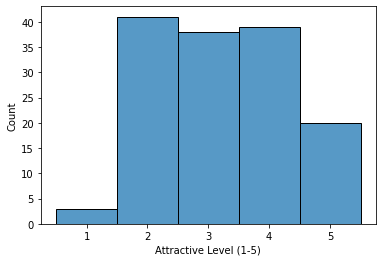

In [242]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [243]:
# for x in pf.columns:
#     try:
#         plt.plot(pf[x],pf["Attractive Level (1-5)"], 'ro')
#         plt.show()
#     except:
#         pass

In [244]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [245]:
X_train, X_test, y_train, y_test = train_test_split(pf[core_columns][:], pf[output_column][:], test_size=0.2, shuffle=False)
print(X_train.shape)
print(X_test.shape)

(112, 5)
(29, 5)


In [246]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
print('Decision tree:')
print('train accuracy: ',clf.score(X_train, y_train))
print('test accuracy: ',clf.score(X_test, y_test))

Decision tree:
train accuracy:  0.8303571428571429
test accuracy:  0.7586206896551724


In [247]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1, solver="lbfgs", multi_class = 'multinomial', max_iter=1e4)
clf.fit(X_train, y_train)
print('Softmax Regression:')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

Softmax Regression:
train accuracy:  0.7962011494252874
test accuracy:  0.8637349170437406


Linear Regression:
train accuracy:  0.7190675134274567
test accuracy:  0.8099358974358973


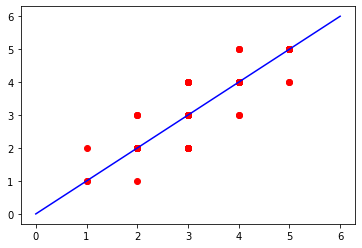

In [248]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
print('Linear Regression:')
result = clf.predict(X_train).round()
plt.plot(result, y_train, 'ro')
plt.plot([0,6],[0,6], 'b-')
# TF = result == y_train
# score = len(TF[TF == True]) / len(TF)

print('train accuracy: ', f1_score(result, y_train, average='macro'))

result = clf.predict(X_test).round()
# TF = result == y_test
# score = len(TF[TF == True]) / len(TF)
print('test accuracy: ', f1_score(result, y_test, average='macro'))

In [249]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(20, 20, 20))
clf.fit(X_train, y_train)
print('Multilayer Perceptron:')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

Multilayer Perceptron:
train accuracy:  0.7874072989851678
test accuracy:  0.824812030075188


/home/nghiatnh/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [250]:
from sklearn.svm import SVC
clf = SVC(C=1)
clf.fit(X_train, y_train)
print('Support Vector Machine:')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))


Support Vector Machine:
train accuracy:  0.8097974399281384
test accuracy:  0.9055812608444187


In [251]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
pickle.dump(clf, open('./KNN_model', 'wb'))

print('KNN')


print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

KNN
train accuracy:  0.7490358834313651
test accuracy:  0.8313451254627725


In [252]:
print(pickle.load(open('./KNN_model', 'rb')))

KNeighborsClassifier()


In [253]:
def DC():
    clf = tree.DecisionTreeClassifier(max_depth = 5)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

def SR():
    clf = LogisticRegression(C=1, solver="lbfgs", multi_class = 'multinomial', max_iter=1000)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

def MLP():
    clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(100,))
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

def SVM():
    clf = SVC(C=1)
    clf.fit(X_train, y_train)
    return (clf.score(X_train, y_train), clf.score(X_test, y_test))

In [254]:
# N = 10
# ls_train = []
# ls_test = []
# for i in range(N):
#     X_train, X_test, y_train, y_test = train_test_split(pf[columns][:], pf[output_column][:], test_size=0.2, shuffle=True)
#     D = [DC(), SR(), MLP(), SVM()]
#     ls_train.append([x[0] for x in D])
#     ls_test.append([x[1] for x in D])
# print('Decision Tree - Softmax Regression - Multilayer Perceptron - Support Vector Machine')
# print('train accuracy: ', np.mean(ls_train, axis=0))
# print('test accuracy: ', np.mean(ls_test, axis=0))